In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from helper import readFile
from helper import oneHotEncoder
from NeuralNetwork import NeuralNetwork

%matplotlib inline

### Load data and One-Hot-Encode

In [2]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw2train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw2dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw2eval_labels.txt', './data/')

# One-Hot-Encode for labels
trainLabel = oneHotEncoder(trainLabel, 9)
devLabel = oneHotEncoder(devLabel, 9)
evalLabel = oneHotEncoder(evalLabel, 9)

In [3]:
print(trainFeature.shape, devFeature.shape, evalFeature.shape)

(5060, 1120) (731, 1120) (909, 1120)


### Relu non-linearity

100 th Iteration is done, used time	 14.88 s
Reach the maximum iteration, training is done !
Total training time: 	 14.88 s


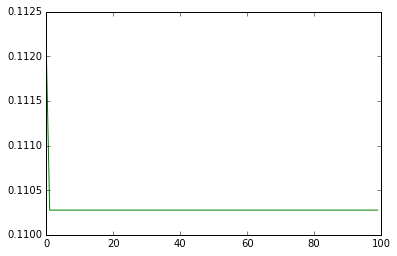

In [4]:
# create the Neural Network classifier
nn = NeuralNetwork(netSize=(50, 50, 9), loss='relu', maxIter=100, 
                   batchSize=5060, learningRate=0.5, CV=True)

# train the model
test = nn.train(trainFeature, trainLabel, showFreq=100)

# get the error rate
trainAcc, w = nn.getParams()

# plot the training accuracy
plt.plot(trainAcc, 'g')
plt.show()

### Sigmoid non-linearity

100 th Iteration is done, used time	 48.71 s
200 th Iteration is done, used time	 93.43 s
300 th Iteration is done, used time	 138.84 s
400 th Iteration is done, used time	 183.48 s
500 th Iteration is done, used time	 228.29 s
600 th Iteration is done, used time	 273.41 s
700 th Iteration is done, used time	 318.99 s
800 th Iteration is done, used time	 364.13 s
900 th Iteration is done, used time	 409.97 s
1000 th Iteration is done, used time	 456.06 s
Reach the maximum iteration, training is done !
Total training time: 	 456.06 s


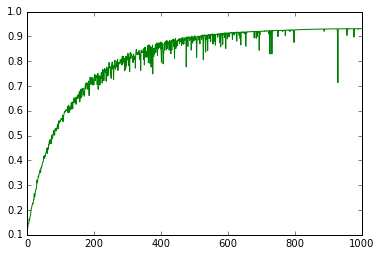

In [3]:
# create the Neural Network classifier
nn = NeuralNetwork(netSize=(50, 50, 9), loss='sigmoid', maxIter=1000, 
                   batchSize=500, learningRate=0.5, CV=True)

# train the model
test = nn.train(trainFeature, trainLabel, showFreq=100)

# get the error rate
trainAcc, w = nn.getParams()

# plot the training accuracy
plt.plot(trainAcc, 'g')
plt.show()

### Tanh non-linearity

100 th Iteration is done, used time	 83.55 s
200 th Iteration is done, used time	 176.32 s
300 th Iteration is done, used time	 257.97 s
400 th Iteration is done, used time	 341.56 s
500 th Iteration is done, used time	 428.11 s
Reach the maximum iteration, training is done !
Total training time: 	 428.11 s


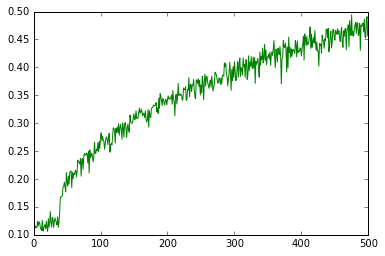

In [7]:
# create the Neural Network classifier
nn = NeuralNetwork(netSize=(50, 50, 9), loss='tanh', maxIter=500, 
                   batchSize=500, learningRate=1.0, CV=True)

# train the model
test = nn.train(trainFeature, trainLabel, showFreq=100)

# get the error rate
trainAcc, w = nn.getParams()

# plot the training accuracy
plt.plot(trainAcc, 'g')
plt.show()